In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Filtered Dataset
filtered_data = Path("Datasets/filtered_data.csv")
filtered_df = pd.read_csv(filtered_data)
filtered_df.head()

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']


In [2]:
audience_df = filtered_df[["Movie Name", "Year of Release", "Movie Rating", "Certification"]]
audience_df.head()

,Movie Name,Year of Release,Movie Rating,Certification
0,Mother's Day,2016.0,5.6,PG-13
1,Spider-Man: Into the Spider-Verse,2018.0,8.4,PG
2,Transformers: Age of Extinction,2014.0,5.6,PG-13
3,Transformers: The Last Knight,2017.0,5.2,PG-13
4,Guardians of the Galaxy Vol. 2,2017.0,7.6,PG-13


In [3]:
# List of Certifications
audience_df["Certification"].value_counts()

Certification
R            624
PG-13        501
PG           189
Not Rated     50
G             12
TV-MA          4
TV-PG          1
TV-14          1
NC-17          1
Unrated        1
Name: count, dtype: int64

In [4]:
# Change extra unnecessary ratings to Other
audience_df['Certification'] = audience_df['Certification'].replace({'TV-MA': 'Other',
                                                                     'TV-PG': 'Other',
                                                                    'TV-14': 'Other',
                                                                    'NC-17': 'Other',
                                                                    'Unrated': 'Not Rated'})

audience_df["Certification"].value_counts()

C:\Users\bookw\AppData\Local\Temp\ipykernel_5884\3408210807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audience_df['Certification'] = audience_df['Certification'].replace({'TV-MA': 'Other',


Certification
R            624
PG-13        501
PG           189
Not Rated     51
G             12
Other          7
Name: count, dtype: int64

In [5]:
# Group by movie rating

acclaim_df = audience_df.loc[(audience_df["Movie Rating"] >= 7.0)]
group = audience_df.groupby(["Movie Rating", "Movie Name"])
group_df = group.sum()
group_df = group_df[["Certification"]]
group_df

Certification
Movie Rating Movie Name                                          
4.9          Alvin and the Chipmunks: The Road Chip            PG
             Gulliver's Travels                                PG
             Knock Knock                                        R
             Ong Bak 3                                          R
             Tammy                                              R
...                                                           ...
8.5          Parasite                                           R
             The Intouchables                                   R
             Whiplash                                           R
8.7          Interstellar                                   PG-13
8.8          Inception                                      PG-13

[1384 rows x 1 columns]

In [6]:
# Filter out for critical acclaimed ratings (>= 7.0)
acclaimed_df = acclaim_df.groupby(["Movie Rating", "Movie Name"])
acclaimed_df.sum()

Year of Release Certification
Movie Rating Movie Name                                         
7.0          22 Jump Street                 2014.0             R
             A Most Violent Year            2014.0             R
             Abominable                     2019.0            PG
             Ant-Man and the Wasp           2018.0         PG-13
             Big Eyes                       2014.0         PG-13
...                                            ...           ...
8.5          Parasite                       2019.0             R
             The Intouchables               2011.0             R
             Whiplash                       2014.0             R
8.7          Interstellar                   2014.0         PG-13
8.8          Inception                      2010.0         PG-13

[488 rows x 2 columns]

In [7]:
percent_value = acclaim_df.Certification.value_counts(normalize=True).mul(100).round(1)
percent_value

Certification
R            43.6
PG-13        34.6
PG           15.0
Not Rated     4.9
G             1.2
Other         0.6
Name: proportion, dtype: float64

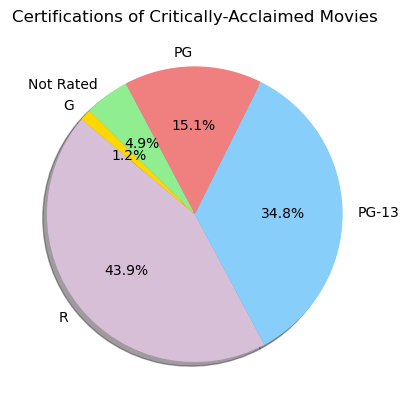

In [25]:
# Create a pie chart split by certification
labels = ["R", "PG-13", "PG", "Not Rated", "G"]
sizes = [43.6, 34.6, 15, 4.9, 1.2]
colors = ['thistle', 'lightskyblue', 'lightcoral', 'lightgreen', 'gold']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Certifications of Critically-Acclaimed Movies')
plt.show()


In [21]:
cert_group = audience_df.groupby("Certification")
avg_df = cert_group[["Movie Rating"]].mean()
avg_df

,Movie Rating
Certification,
G,6.950000
Not Rated,6.870588
Other,6.542857
PG,6.654497
PG-13,6.591018
R,6.626923


In [27]:
# create a Boolean mask for the rows to remove
other = avg_df.index == 'Other'

# select all rows except the ones that contain 'Coca Cola'
avg_df = avg_df[~other]

avg_df


,Movie Rating
Certification,
G,6.950000
Not Rated,6.870588
PG,6.654497
PG-13,6.591018
R,6.626923


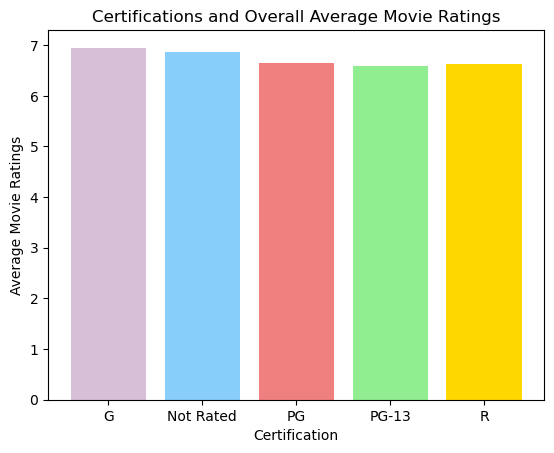

In [32]:
# Bar graph
colors = ['thistle', 'lightskyblue', 'lightcoral', 'lightgreen', 'gold']
plt.bar(avg_df.index, avg_df["Movie Rating"], color=colors, align="center")
plt.title("Certifications and Overall Average Movie Ratings")
plt.xlabel("Certification")
plt.ylabel("Average Movie Ratings")
plt.show()

In [36]:
# Bar graph with filtered critical acclaim
acclaim_avg = acclaim_df.groupby("Certification")
acclaim_avg_df = acclaim_avg[["Movie Rating"]].mean()

other = acclaim_avg_df.index == 'Other'
acclaim_avg_df = acclaim_avg_df[~other]
acclaim_avg_df


,Movie Rating
Certification,
G,7.483333
Not Rated,7.512500
PG,7.461644
PG-13,7.473373
R,7.474648


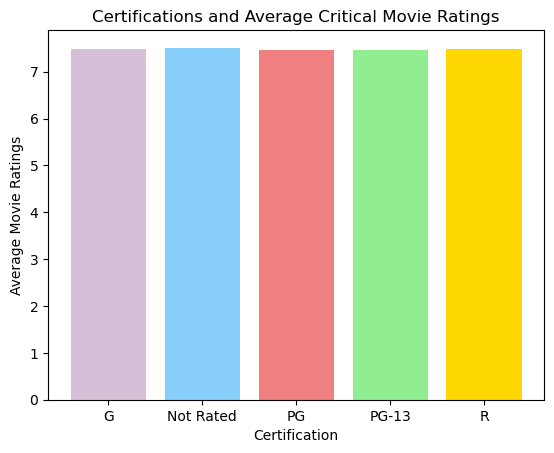

In [37]:
colors = ['thistle', 'lightskyblue', 'lightcoral', 'lightgreen', 'gold']
plt.bar(acclaim_avg_df.index, acclaim_avg_df["Movie Rating"], color=colors, align="center")
plt.title("Certifications and Average Critical Movie Ratings")
plt.xlabel("Certification")
plt.ylabel("Average Movie Ratings")
plt.show()